# Capstone Project 1
## House price prediction
data: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [17]:
data_directory = 'data_zillow_econ/Zip_time_series.csv'
df = pd.read_csv(data_directory, parse_dates=True, index_col='Date')
df.shape

(4383885, 75)

## 1. Data wrangling
This section aims to check data quality, and offers a first pass to correct data that are apparently wrong.The focus for this project is to make house price prediction for the western houston area. Therefore, only certain zip codes are selected.The zip codes selected for the project are: 
+ Saterlite cities:
++ Katy: [77493, 77494]
++ Sugarland: [77478, 77479, 77487, 77496, 77498]
++ Pearland: [77047, 77089, 77581, 77584, 77588]
+ Houston:
++ West University: [77005]
++ Rice Military: [77007]
++ Memorial: [77024]
++ Medical: [77025, 77054, 77030, 77004]
++ Heights: [77007, 77008, 77009]

In [18]:
# only certain zip codes are included in the analysis
katy = [77493, 77494]
sugarland = [77478, 77479, 77498]
pearland = [77047, 77089, 77581, 77584]
west_univ = [77005]
rice_mil = [77007]
memorial = [77024]
medical = [77025, 77054, 77030, 77004]
heights = [77007, 77008, 77009]
zip_codes = {'katy':katy,
             'sugarland':sugarland,
            'pearland':pearland,
            'west_univ':west_univ,
            'rice_military':rice_mil,
            'memorial':memorial,
            'medical':medical,
            'heights':heights}

# extract data from df to df_houston
df_houston = []
ct = 0
for key, zip_code in zip_codes.items():
    for z in zip_code:
        df_temp = df[df['RegionName']==z]
        print('zip code is: '+str(z)+', and the data shape is: '+str(df_temp.shape))
        df_temp['Region'] = key # add a region column to store the region names
        df_houston.append(df_temp)
        ct += 1
df_houston = pd.concat(df_houston, join='outer', axis = 0)
df_houston.rename(columns={'RegionName':'zip_code'}, inplace=True)
print('df_houston shape is: '+str(df_houston.shape))

zip code is: 77493, and the data shape is: (96, 75)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


zip code is: 77494, and the data shape is: (261, 75)
zip code is: 77478, and the data shape is: (96, 75)
zip code is: 77479, and the data shape is: (96, 75)
zip code is: 77498, and the data shape is: (96, 75)
zip code is: 77047, and the data shape is: (261, 75)
zip code is: 77089, and the data shape is: (96, 75)
zip code is: 77581, and the data shape is: (261, 75)
zip code is: 77584, and the data shape is: (261, 75)
zip code is: 77005, and the data shape is: (261, 75)
zip code is: 77007, and the data shape is: (261, 75)
zip code is: 77024, and the data shape is: (96, 75)
zip code is: 77025, and the data shape is: (261, 75)
zip code is: 77054, and the data shape is: (261, 75)
zip code is: 77030, and the data shape is: (251, 75)
zip code is: 77004, and the data shape is: (261, 75)
zip code is: 77007, and the data shape is: (261, 75)
zip code is: 77008, and the data shape is: (261, 75)
zip code is: 77009, and the data shape is: (261, 75)
df_houston shape is: (3959, 76)


In [19]:
# check the number of none-nan values in df_houston
df_houston.count()

zip_code                                                         3959
InventorySeasonallyAdjusted_AllHomes                             1728
InventoryRaw_AllHomes                                            1728
MedianListingPricePerSqft_1Bedroom                                 16
MedianListingPricePerSqft_2Bedroom                                381
MedianListingPricePerSqft_3Bedroom                               1138
MedianListingPricePerSqft_4Bedroom                               1063
MedianListingPricePerSqft_5BedroomOrMore                          318
MedianListingPricePerSqft_AllHomes                               1580
MedianListingPricePerSqft_CondoCoop                               260
MedianListingPricePerSqft_DuplexTriplex                             0
MedianListingPricePerSqft_SingleFamilyResidence                  1562
MedianListingPrice_1Bedroom                                        12
MedianListingPrice_2Bedroom                                       421
MedianListingPrice_3

In [37]:
# averge values categorized by region and date        
df_temp = df_houston.groupby(['Region','Date']).mean()
df_temp.tail(20)

zip_code  InventorySeasonallyAdjusted_AllHomes  \
Region    Date                                                         
west_univ 2016-05-31   77005.0                                 139.0   
          2016-06-30   77005.0                                 146.0   
          2016-07-31   77005.0                                 151.0   
          2016-08-31   77005.0                                 153.0   
          2016-09-30   77005.0                                 153.0   
          2016-10-31   77005.0                                 151.0   
          2016-11-30   77005.0                                 145.0   
          2016-12-31   77005.0                                 138.0   
          2017-01-31   77005.0                                 131.0   
          2017-02-28   77005.0                                 124.0   
          2017-03-31   77005.0                                 122.0   
          2017-04-30   77005.0                                 129.0   
          2017-05-31   77005.0                                 136.0   
          2017-06-30   77005.0                                 139.0   
          2017-07-31   77005.0                                 145.0   
          2017-08-31   77005.0                                 151.0   
          2017-09-30   77005.0                                 148.0   
          2017-10-31   77005.0                                 138.0   
          2017-11-30   77005.0                                 131.0   
          2017-12-31   77005.0                                 129.0   

                      InventoryRaw_AllHomes  \
Region    Date                                
west_univ 2016-05-31                  154.0   
          2016-06-30                  166.0   
          2016-07-31                  162.0   
          2016-08-31                  159.0   
          2016-09-30                  154.0   
          2016-10-31                  148.0   
          2016-11-30                  139.0   
          2016-12-31                  112.0   
          2017-01-31                  107.0   
          2017-02-28                  107.0   
          2017-03-31                  126.0   
          2017-04-30                  143.0   
          2017-05-31                  158.0   
          2017-06-30                  154.0   
          2017-07-31                  154.0   
          2017-08-31                  162.0   
          2017-09-30                  150.0   
          2017-10-31                  134.0   
          2017-11-30                  121.0   
          2017-12-31                  106.0   

                      MedianListingPricePerSqft_1Bedroom  \
Region    Date                                             
west_univ 2016-05-31                                 NaN   
          2016-06-30                                 NaN   
          2016-07-31                                 NaN   
          2016-08-31                                 NaN   
          2016-09-30                                 NaN   
          2016-10-31                                 NaN   
          2016-11-30                                 NaN   
          2016-12-31                                 NaN   
          2017-01-31                                 NaN   
          2017-02-28                                 NaN   
          2017-03-31                                 NaN   
          2017-04-30                                 NaN   
          2017-05-31                                 NaN   
          2017-06-30                                 NaN   
          2017-07-31                                 NaN   
          2017-08-31                                 NaN   
          2017-09-30                                 NaN   
          2017-10-31                                 NaN   
          2017-11-30                                 NaN   
          2017-12-31                                 NaN   

                      MedianListingPricePerSqft_2Bedroom  \
Region    Date       

In [38]:
df_temp = df_temp.unstack(level=0)

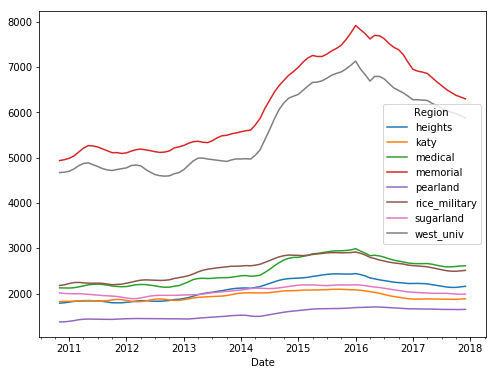

In [54]:
df_temp['Zri_SingleFamilyResidenceRental'].plot(figsize=(8,6))
plt.show()

In [67]:
df_temp['DaysOnZillow'].plot(figsize=(7,5))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

KeyError: 'DaysOnZillow'

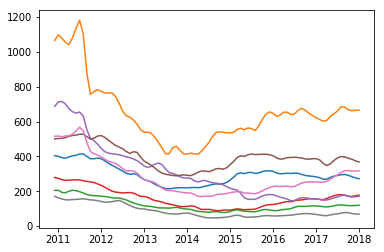

In [52]:
plt.plot(df_temp['InventorySeasonallyAdjusted_AllHomes']/df_temp['ZriPerSqft_AllHomes'])
plt.show()

In [72]:
a = [1,2,1,2,3,44,1,1,2]
dict = {}
for i in a:
    if str(i) in dict.keys():
        dict[str(i)] += 1
    else:
        dict[str(i)] = 0
dict

{'1': 3, '2': 2, '3': 0, '44': 0}

# Try again: Data by Cities
zip code data (for houston area) only contains data from 2010. Will see if data by states will give more insight into the data story.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_directory = 'data_zillow_econ/city_time_series.csv'
df = pd.read_csv(data_directory, parse_dates=True, index_col='Date')
df.shape

(3762566, 80)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3762566 entries, 1996-04-30 to 2017-12-31
Data columns (total 80 columns):
RegionName                                                       object
InventorySeasonallyAdjusted_AllHomes                             float64
InventoryRaw_AllHomes                                            float64
MedianListingPricePerSqft_1Bedroom                               float64
MedianListingPricePerSqft_2Bedroom                               float64
MedianListingPricePerSqft_3Bedroom                               float64
MedianListingPricePerSqft_4Bedroom                               float64
MedianListingPricePerSqft_5BedroomOrMore                         float64
MedianListingPricePerSqft_AllHomes                               float64
MedianListingPricePerSqft_CondoCoop                              float64
MedianListingPricePerSqft_DuplexTriplex                          float64
MedianListingPricePerSqft_SingleFamilyResidence                  float

In [24]:
df['RegionName'].head(20)

Date
1996-04-30          abbottstownadamspa
1996-04-30           aberdeenbinghamid
1996-04-30           aberdeenharfordmd
1996-04-30            aberdeenmonroems
1996-04-30             aberdeenmoorenc
1996-04-30             abernathyhaletx
1996-04-30             abilenetaylortx
1996-04-30           abingdonharfordmd
1996-04-30              abingdonknoxil
1996-04-30        abingdonwashingtonva
1996-04-30        abingtonmontgomerypa
1996-04-30          abingtonplymouthma
1996-04-30              abramsocontowi
1996-04-30           abseconatlanticnj
1996-04-30           accidentgarrettmd
1996-04-30    accokeekprince_georgesmd
1996-04-30        acres_greendouglasco
1996-04-30          actonlos_angelesca
1996-04-30            actonmiddlesexma
1996-04-30                 actonyorkme
Name: RegionName, dtype: object

In [3]:
data_directory = 'data_zillow_econ/cities_crosswalk.csv'
df_citycrosswalk = pd.read_csv(data_directory)

In [12]:
df = df.reset_index()
df_new = pd.merge(df, df_citycrosswalk, how='left', left_on='RegionName', right_on='Unique_City_ID')

In [41]:
df_new = df_new.set_index('Date')

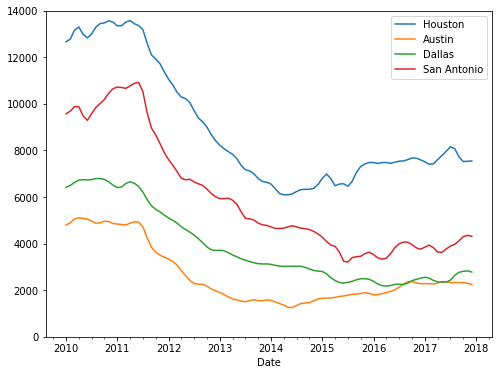

In [64]:
df_Houston = df_new[(df_new.City=='Houston') & (df_new.State=='TX')]
df_Austin = df_new[(df_new.City=='Austin') & (df_new.State=='TX')]
df_Dallas = df_new[(df_new.City=='Dallas') & (df_new.State=='TX')]
df_SanAnt = df_new[(df_new.City=='San Antonio') & (df_new.State=='TX')]
df_Houston['InventorySeasonallyAdjusted_AllHomes'].plot(figsize=(8,6))
df_Austin['InventorySeasonallyAdjusted_AllHomes'].plot(figsize=(8,6))
df_Dallas['InventorySeasonallyAdjusted_AllHomes'].plot(figsize=(8,6))
df_SanAnt['InventorySeasonallyAdjusted_AllHomes'].plot(figsize=(8,6))
plt.legend(['Houston','Austin','Dallas','San Antonio'])
plt.ylim((0,14000))
plt.show()

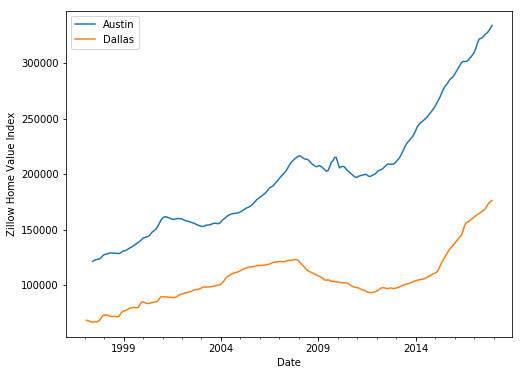

In [68]:
#df_Houston['ZHVI_MiddleTier'].plot(figsize=(8,6))
df_Austin['ZHVI_MiddleTier'].plot(figsize=(8,6))
df_Dallas['ZHVI_MiddleTier'].plot(figsize=(8,6))
plt.legend(['Austin','Dallas'])
plt.ylabel('Zillow Home Value Index')
plt.show()

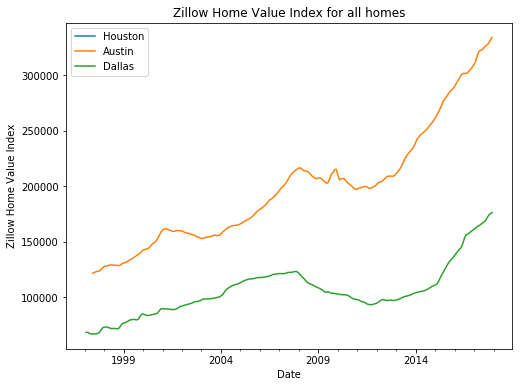

In [72]:
df_Houston['ZHVI_AllHomes'].plot(figsize=(8,6))
df_Austin['ZHVI_AllHomes'].plot(figsize=(8,6))
df_Dallas['ZHVI_AllHomes'].plot(figsize=(8,6))
plt.legend(['Houston','Austin','Dallas'])
plt.ylabel('Zillow Home Value Index')
plt.title('Zillow Home Value Index for all homes')
plt.show()

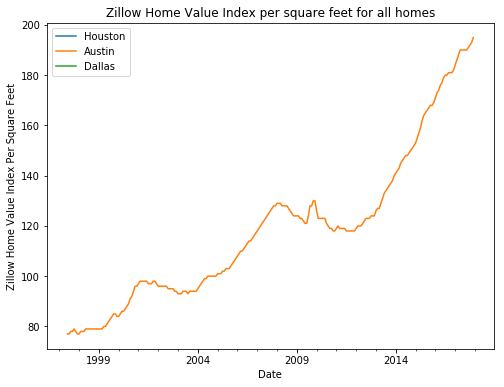

In [75]:
df_Houston['ZHVIPerSqft_AllHomes'].plot(figsize=(8,6))
df_Austin['ZHVIPerSqft_AllHomes'].plot(figsize=(8,6))
df_Dallas['ZHVIPerSqft_AllHomes'].plot(figsize=(8,6))
plt.legend(['Houston','Austin','Dallas'])
plt.ylabel('Zillow Home Value Index Per Square Feet')
plt.title('Zillow Home Value Index per square feet for all homes')
plt.show()

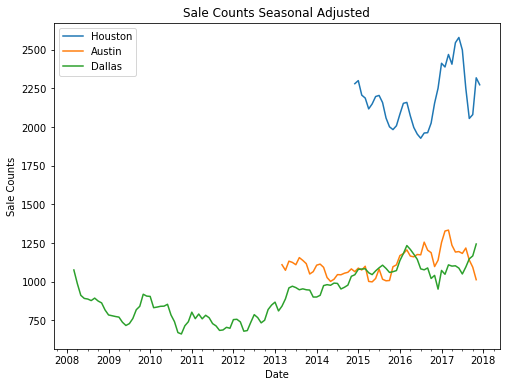

In [74]:
df_Houston['Sale_Counts_Seas_Adj'].plot(figsize=(8,6))
df_Austin['Sale_Counts_Seas_Adj'].plot(figsize=(8,6))
df_Dallas['Sale_Counts_Seas_Adj'].plot(figsize=(8,6))
plt.legend(['Houston','Austin','Dallas'])
plt.ylabel('Sale Counts')
plt.title('Sale Counts Seasonal Adjusted')
plt.show()